# Spotify Song Genre Prediction
W207

Group Members: Ivan Escalona, Daisy Khamphakdy, Iris Lew, Shuo Wang, Amanda Teschko

Objective (problem statement):

Dataset: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify

Model: 

---


**Features Definitions:**
*   **Danceability** - how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
*   **Energy** - a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
*   **Key** - estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
*   **Loudness** - overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
*   **Mode** - the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
*   **Speechiness** - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
*   **Acousticness** - a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
*   **Instrumentalness** - detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. (THIS MIGHT BE A PREDICTION AND ALGORITHM FROM SPOTIFY**)
*   **Liveness** - detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
*   **Time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
*   **Duration_ms** - The duration of the track in milliseconds.
*   **Valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
*   **Tempo** - the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**References:**
1.   https://www.kaggle.com/code/pelinsoylu/spotify-popularity-prediction-ml-practice

---







In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

## Load Data

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

raw_df = pd.read_csv('/content/gdrive/My Drive/W207 Final Project/genres_v2.csv')


Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##Exploratory Data Analysis

In [3]:
# Check first few rows of the dataset. 
raw_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
# Check the number of rows and columns.
raw_df.shape

(42305, 22)

In [5]:
# Check genre column as our analysis will focus on genres.
raw_df["genre"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

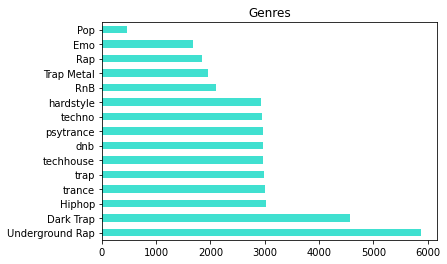

In [6]:
#Plot the above date from genre column in bar plot for better vizualization
raw_df["genre"].value_counts().plot(kind="barh",color=["turquoise"],title="Genres");

####Check Missing Data:

In [7]:
#Check missing data
print("----------- Columns with missing data ------------")
for col in raw_df.columns:
    pct_missing = raw_df[col].isnull().sum()/len(raw_df[col])*100
    if pct_missing > 0:
        print("Column:", col, "       % of records missing:", "{0:.2f}%".format(pct_missing))

print("\n----------- Count of columns with N/A ------------")
raw_df.isna().sum()

----------- Columns with missing data ------------
Column: song_name        % of records missing: 49.13%
Column: Unnamed: 0        % of records missing: 50.88%
Column: title        % of records missing: 50.88%

----------- Count of columns with N/A ------------


danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

####Drop NA data:

In [8]:
# Drop columns: 'Unnamed: 0' and 'title'
df = raw_df.drop(['Unnamed: 0','title'], axis=1)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom


There are missing values in the last three columns, so we have decided to drop the columns 'Unnamed: 0' and 'title'. Since our focus is on genres, it will not heavily impact our prediction and analysis.

In [9]:
print("---------Unique values per Column----------")
df.nunique().sort_values(ascending=False)

---------Unique values per Column----------


id                  35877
analysis_url        35877
track_href          35877
uri                 35877
duration_ms         26261
tempo               15606
song_name           15439
loudness            11654
instrumentalness     4757
acousticness         4602
liveness             1695
valence              1674
speechiness          1447
energy                917
danceability          890
genre                  15
key                    12
time_signature          4
mode                    2
type                    1
dtype: int64

In [10]:
# Check the data types in our dataframe.
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
dtype: object

In [11]:
print("--------Types of Columns--------")
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_cols = list(df.select_dtypes(include=numerics).columns)

categorical_cols = list(df.select_dtypes(exclude=numerics).columns)

# Move some numeric to categorical
switch_cols = ['mode', 'key']
numeric_cols = [i for i in numeric_cols if i not in (switch_cols)]
categorical_cols.extend(switch_cols)


print(len(numeric_cols), "numeric columnss:", numeric_cols)
print()
print(len(categorical_cols),"categorical columns:", categorical_cols)

#Perhaps move time_signature into categorical and one hot encoding than numerical


--------Types of Columns--------
11 numeric columnss: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

9 categorical columns: ['type', 'id', 'uri', 'track_href', 'analysis_url', 'genre', 'song_name', 'mode', 'key']


In [12]:
print("----------Numeric Column Summary Stats-------------")
df[numeric_cols].describe().transpose()

----------Numeric Column Summary Stats-------------


,count,mean,std,min,25%,50%,75%,max
danceability,42305.0,0.639364,0.156617,0.065100,0.52400,0.64600,0.766,0.988
energy,42305.0,0.762516,0.183823,0.000243,0.63200,0.80300,0.923,1.000
loudness,42305.0,-6.465442,2.941165,-33.357000,-8.16100,-6.23400,-4.513,3.148
speechiness,42305.0,0.136561,0.126168,0.022700,0.04910,0.07550,0.193,0.946
acousticness,42305.0,0.096160,0.170827,0.000001,0.00173,0.01640,0.107,0.988
instrumentalness,42305.0,0.283048,0.370791,0.000000,0.00000,0.00594,0.722,0.989
liveness,42305.0,0.214079,0.175576,0.010700,0.09960,0.13500,0.294,0.988
valence,42305.0,0.357101,0.233200,0.018700,0.16100,0.32200,0.522,0.988
tempo,42305.0,147.474056,23.844623,57.967000,129.93100,144.97300,161.464,220.290
duration_ms,42305.0,250865.846685,102957.713571,25600.000000,179840.00000,224760.00000,301133.000,913052.000


####Histograms of Song Characteristics and Number of Occurances:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Bar graph of song characteristics and the occurance')

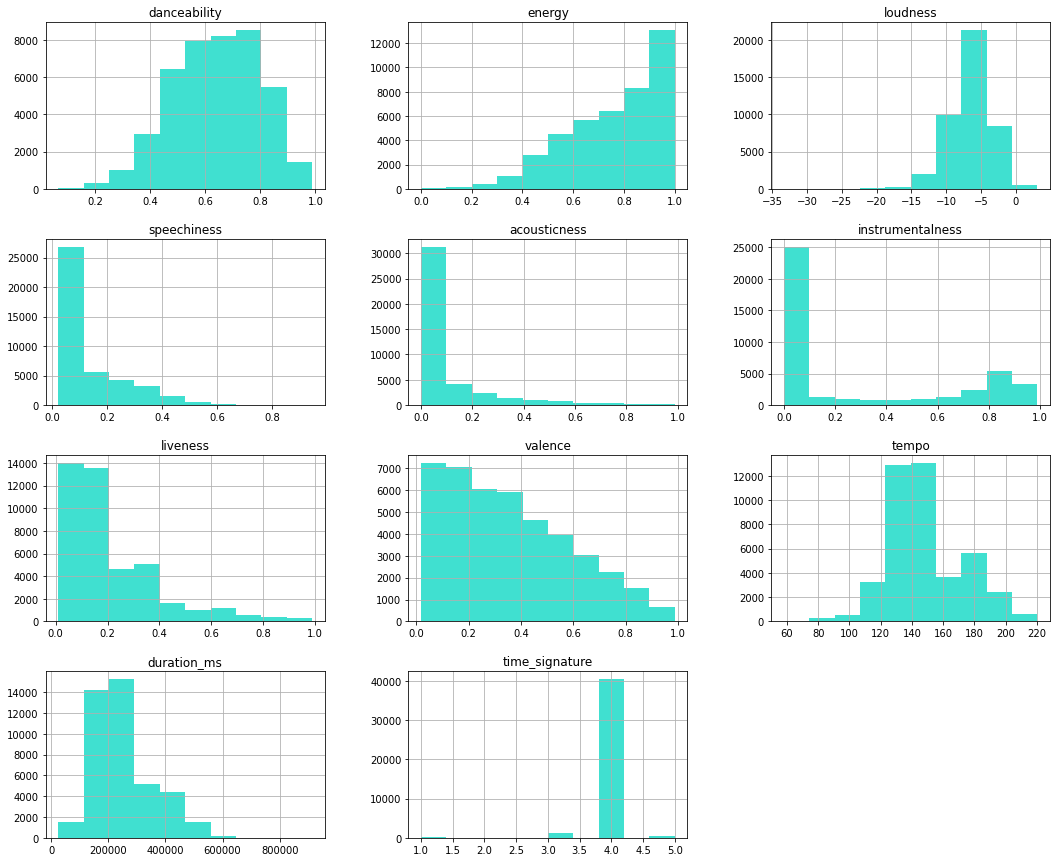

In [13]:
fig = plt.figure(figsize = (18,15))
ax = fig.gca()
df[numeric_cols].hist(ax = ax, bins=10, color ='turquoise')
plt.title('Bar graph of song characteristics and the occurance')

Observations of the Histograms above:

CHARACTERISTICS |VALUE RANGE | OBSERVATIONS |
-|-|-|
Danceability|0-1|mean = 0.63|
Energy|0-1|as the value increases, occurance increases|
Key|0-11|...|
Loudness|-10 to -3|...|
Mode|0 or 1|...|
Speechiness|0-1|as the speech decreases, occurance increases|
Acousticness|0-1|as value increases, occurance decreases|
Instrumentalness|0-1|slight peak from 0.8 to 0.95|
Liveness|0-1|...|
Valence|0-1|as value increases, occurance decreases|
Tempo|70-220|...|
Duration_ms|0-800,000 milliseconds|...|
Time_signature|it has only 3 values (3,4,5)|max occurance is 4|

####Identify Correlations with Heatmap:

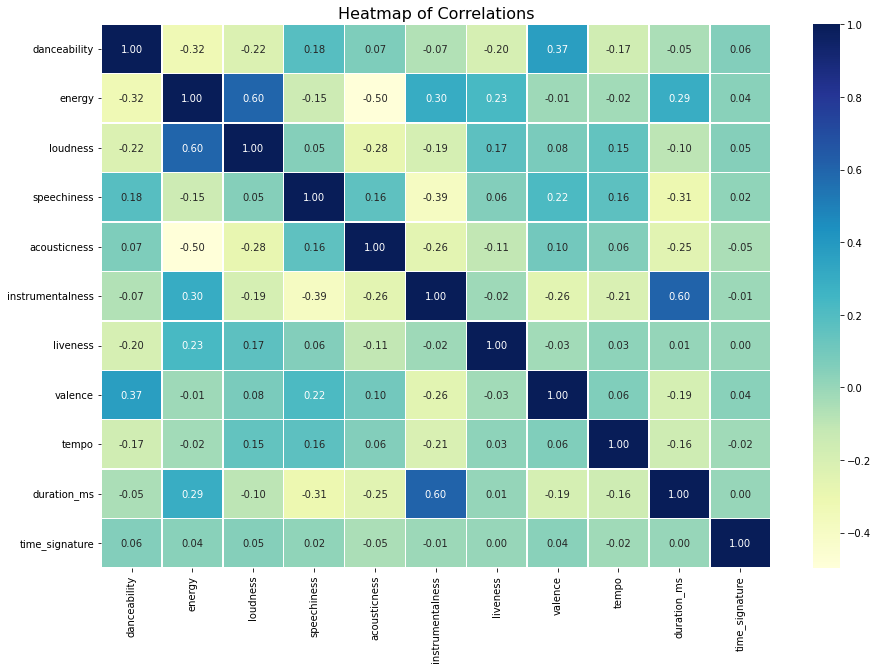

In [14]:
correlation_mat =df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(15,10))   
plt.title('Heatmap of Correlations', fontsize=16)
sns.heatmap(correlation_mat, annot = True, ax=ax, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

Observations of the Heatmap Correlations:

*   Highest positive correlation = Energy and Loudness (0.6).  Colinearity here bc defintion is that energy is included in loudness. Instrumentalness & duration also might be colinearity
*   Lowest positive correlation = Loudness & Acousticness (-0.5)



  
####Bar Graphs of Genres and Song Characteristics:

<Figure size 1440x720 with 0 Axes>

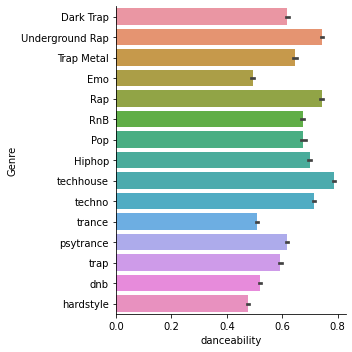

<Figure size 1440x720 with 0 Axes>

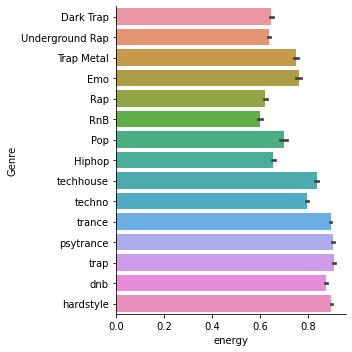

<Figure size 1440x720 with 0 Axes>

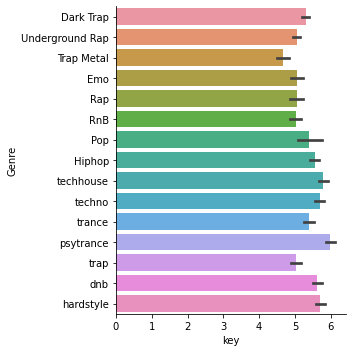

<Figure size 1440x720 with 0 Axes>

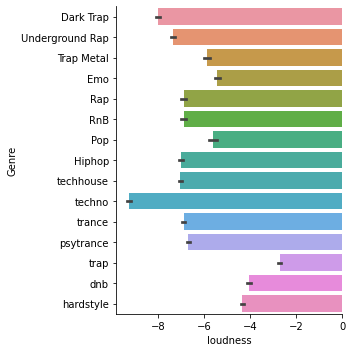

<Figure size 1440x720 with 0 Axes>

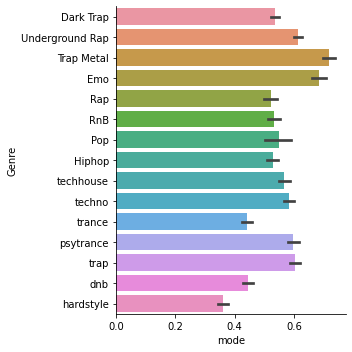

<Figure size 1440x720 with 0 Axes>

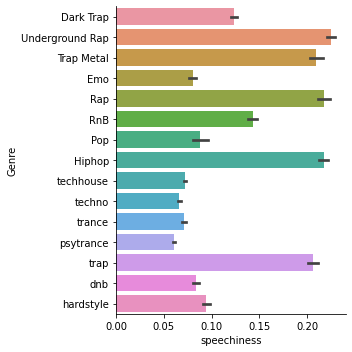

<Figure size 1440x720 with 0 Axes>

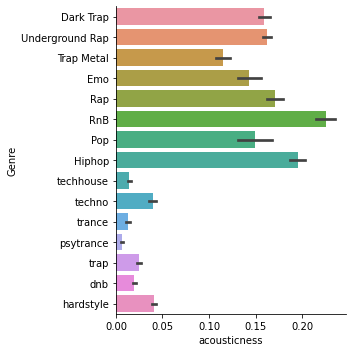

<Figure size 1440x720 with 0 Axes>

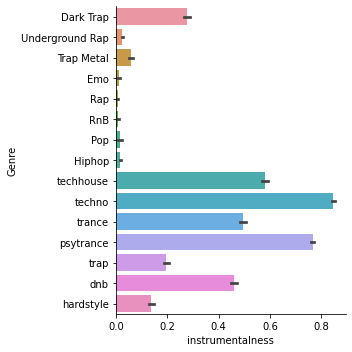

<Figure size 1440x720 with 0 Axes>

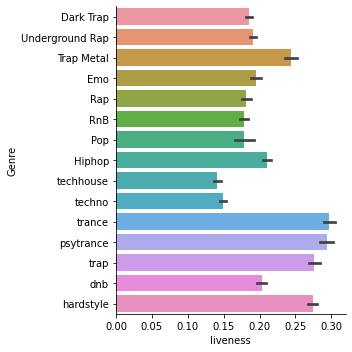

<Figure size 1440x720 with 0 Axes>

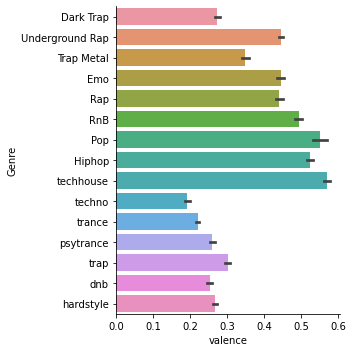

<Figure size 1440x720 with 0 Axes>

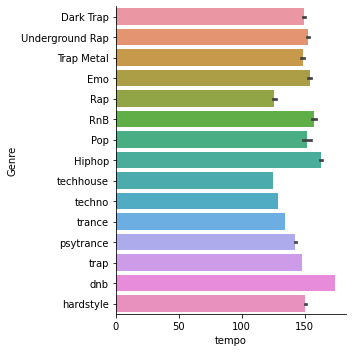

<Figure size 1440x720 with 0 Axes>

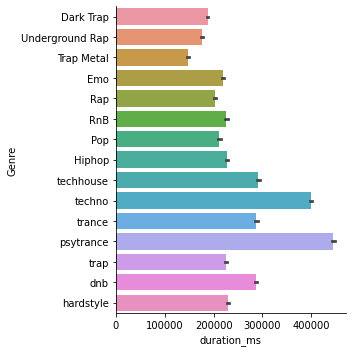

In [15]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness','acousticness', 'instrumentalness', 'liveness','valence','tempo','duration_ms']
def plotting(feature):
    plt.figure(figsize=(20, 10))
    plot = sns.catplot(x=feature, y='genre', data=df, kind='bar')
    plot.set_ylabels('Genre')
    plt.show()
    
for x in features:
    plotting(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


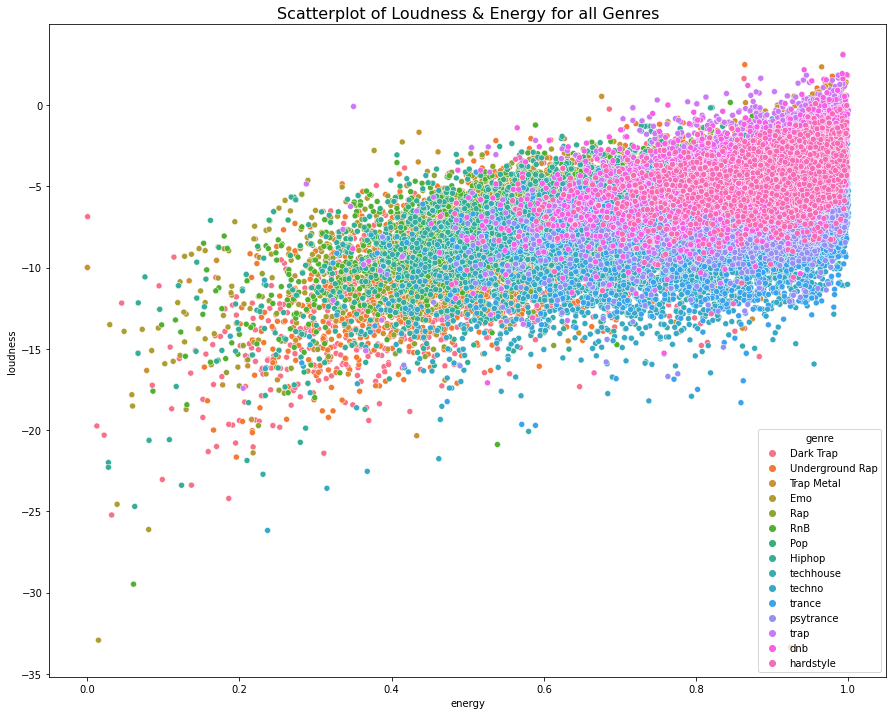

In [16]:
plt.figure (figsize=(15, 12))
plt.title('Scatterplot of Loudness & Energy for all Genres', fontsize=16)
sns.scatterplot(df['energy'],df['loudness'],hue=df['genre'],x_bins=30);

####Check Song Name:

In [17]:
df["song_name"].value_counts().sort_index()

"Enough."                           1
"Life"                              2
"Quarter Century Freestyle"         1
"The Take Over, The Breaks Over"    3
"You said you love me..."           1
                                   ..
• Tales                             1
ムスティネ                               1
泳 (Yong)                            1
ꞌCosmicꞌ.m4a                        2
행복                                  1
Name: song_name, Length: 15439, dtype: int64

In [18]:
df["song_name"].value_counts(ascending=False,dropna=False)

NaN               20786
Forever              14
Lost                 12
Alone                11
Revenge              11
                  ...  
Salary                1
Patek Philippe        1
ForceQuit             1
Red Nose              1
Can't Hold On         1
Name: song_name, Length: 15440, dtype: int64

In [19]:
# Show the percentage of repeated words in song_name 
repeatSongNamePercent = df['song_name'].value_counts(normalize=True)
repeatSongNamePercent.head(50)


Forever                                               0.000651
Lost                                                  0.000558
Runaway                                               0.000511
Revenge                                               0.000511
Scars                                                 0.000511
Numb                                                  0.000511
PTSD                                                  0.000511
Hollow                                                0.000511
Alone                                                 0.000511
Leave Me Alone                                        0.000465
Lonely                                                0.000465
Intro                                                 0.000418
Falling                                               0.000418
Energy                                                0.000418
Beautiful                                             0.000418
Perfect                                               0

####Outliers:

In [20]:
# Outliers:


# Following 1.5Q1, Q3 rule for outliers
q1 = df[numeric_cols].describe().iloc[4,:]

q3 = df[numeric_cols].describe().iloc[6,:]

outliers_df = pd.DataFrame(index=df.index)

for column in numeric_cols:
    print(column)
    
    outliers_df[column] = df[column].loc[(df[column] < 1.5*q1[column]) | (df[column] > 1.5*q3[column])]

danceability
energy
loudness
speechiness
acousticness
instrumentalness
liveness
valence
tempo
duration_ms
time_signature


In [21]:
# This is a count of the outliers that we're dealing with

#In box plots you can see a lot of outliers, make sure to check. Outliers maybe expected as it's art.

# Out of 

outliers_count = {}

for column in outliers_df.columns:
    outliers_count[column] = round(outliers_df[column].notna().sum()*100/outliers_df.shape[0], 2)

outliers_count

{'danceability': 79.18,
 'energy': 83.09,
 'loudness': 61.6,
 'speechiness': 63.19,
 'acousticness': 48.38,
 'instrumentalness': 0.0,
 'liveness': 64.34,
 'valence': 44.24,
 'tempo': 95.59,
 'duration_ms': 73.99,
 'time_signature': 100.0}

##KNN
** Consider removing features that don't have distinct patterns (or are irrelebant) because it will result in a strong model.

1) Normalize data

In [22]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [24]:
from pandas.core.groupby import DataFrameGroupBy
# Drop unnecessary columns

#columns_to_drop = ['analysis_url','track_href','type','uri']
# columns_to_drop = ['id','analysis_url','track_href','type','uri','song_name']
# df.drop(columns_to_drop, axis=1,inplace=True)
#df.rename(columns={'id': 'track_id'}, inplace=True)

# Drop all non numeric columns except for genre.
num_data = df.drop(["song_name","analysis_url","track_href","uri","id","type"],axis=1)
# print num_data
# num_data

# Split data into X and y
X = num_data.drop("genre",axis=1)
y = num_data["genre"]

#Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

knn_clf = neigh.fit(X_train, y_train.ravel())

In [26]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
11533,0.847,0.564,6,-9.341,0,0.0667,0.152000,0.631000,0.3390,0.443,115.962,119165,4
24044,0.757,0.971,6,-5.623,1,0.0652,0.007380,0.731000,0.1410,0.857,124.950,219840,4
38369,0.549,0.765,10,-5.432,1,0.0489,0.003880,0.000004,0.1650,0.209,173.873,255172,4
2516,0.582,0.798,8,-5.230,0,0.0295,0.002420,0.019700,0.0976,0.132,130.021,232629,4
40671,0.482,0.891,6,-3.474,0,0.0376,0.000743,0.000001,0.4140,0.175,149.931,136018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,0.490,0.921,6,-3.373,1,0.4370,0.288000,0.000000,0.4820,0.497,150.514,237733,4
32511,0.546,0.921,1,-5.308,1,0.0399,0.000253,0.827000,0.0915,0.273,143.002,460500,4
5192,0.626,0.603,5,-9.047,0,0.2070,0.045000,0.000228,0.1330,0.138,113.078,474157,4
12172,0.508,0.542,11,-8.744,0,0.1020,0.175000,0.000276,0.1150,0.167,129.931,138702,4


In [27]:
train_result_knn = knn_clf.predict(X_train)
test_result_knn = knn_clf.predict(X_test)

TypeError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error

print('Training MSE: ', mean_squared_error(y_train, train_result_knn))
print('Test MSE: ', mean_squared_error(y_test, test_result_knn))

In [ ]:
# View scatter plot of train and data set results
fig = plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(indices_train, train_result_dec.ravel(), label = 'train result')
ax1 = sns.scatterplot(indices_train, y_train.ravel(),label = 'actual data')
plt.title('DT')
plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(indices_test, test_result_dec.ravel(), label = 'test result')
ax2 = sns.scatterplot(indices_test, y_test.ravel(),label = 'actual data')
plt.title('DT')

### Compare 3 models:
1. Logistic Regression
2. KNN
3. Random Forest

In [ ]:
#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a function to compare models easily
models={"LogReg":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
def fit_and_score (models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    """
    np.random.seed(1)
    model_scores={}
    for name , model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

###Compare Models

In [ ]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.barh(color=["turquoise"]);

###With the accuracy scores of the models, let's look at these aspects:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision, Recall, F1 score
* Classification report

###Hyperparameter tuning for KNN

In [ ]:
#Tuning for KNN model
train_scores=[]
test_scores=[]
#Create list of different n-neighbors
neighbors = range(1,15)
#Setup KNN instance
knn=KNeighborsClassifier()
#Loop through different neigbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train) #Fit the model
    train_scores.append(knn.score(X_train,y_train)) #Update the train score list
    test_scores.append(knn.score(X_test,y_test)) #Update test scores list

In [ ]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,15,1))
plt.yticks(np.arange(0.1,1,0.1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Scores")
plt.legend;

The above chart shows that the best K-value giving higher prediction is 1 where we can see 36% accuracy level which is still low.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

#relevantFeatures =

# scaler = StandardScaler()
# scaler.fit(df.drop('duration_ms', 'time_signature', 'genre'))
# scaled_features = scaler.transform(df.drop('duration_ms', 'time_signature', 'genre'))

scaler = MinMaxScaler()
 
test=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
print(test)

2) Split Train and Test Data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#df

# Get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, shuffle=True)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
#Get Euclidean Distance

def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        sum += (v1[index] - v2[index]) ** 2
    return sum ** 0.5

dists = []
for i in range(len(X_train) - 1):
    for j in range(i + 1, len(X_train)):
        dist = EuclideanDistance(X_train[i], X_train[j])
        dists.append(dist)
        
fig = plt.hist(dists, 100)

### Scale Features in the Range of 0-1
Many of the features have values between 0 and 1 and others have values ranging from 70-220 (Tempo) and up to 800,000 (duration_ms). We divide the dataset into train, test sets and we scale the features with the value range of 0-1. 

In [ ]:
# Normalize or scale values so that they range between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = X.columns
scaled.head()

In [ ]:
scaled = scaler.fit_transform(X)

## Elbow Method - Finding the right amount of clusters
For Kmeans, K is the optimal number of clusters our data will be divided in. We may pick a random number, but to ensure precision we use the elbow method, which creates a plot with the number of clusters on the x-axis and the total within sum of squares on the y-axis and then identifying where an “elbow” or bend appears in the plot.

In [ ]:
wcss = [] # Within Cluster Sum of Square
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [ ]:
wcss

## Kmeans
We now attempt to organize our song into clusters based on common song characteritic similarities.

In [ ]:
# Instantiating model
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Visualize clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(scaled[y_kmeans == 6,0], scaled[y_kmeans == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(scaled[y_kmeans == 7,0], scaled[y_kmeans == 7,1], s= 50, c= 'pink', label= 'Cluster 8')
plt.scatter(scaled[y_kmeans == 8,0], scaled[y_kmeans == 8,1], s= 50, c= 'silver', label= 'Cluster 9')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, marker='*', edgecolor='black', c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [ ]:
# Predictions
y_kmeans

In [ ]:
# Convert preditcions into a dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['K_Cluster']

# Predictions as a dataframe
print(kmeans.shape)
kmeans.head()

In [ ]:
# Concatenate the cluster column to the dataframe
df_cluster = pd.concat([df, kmeans], axis=1)

# Look at dataframe
print(df_cluster.shape)
df_cluster.head()

###Check if our clustering/model did well

In [ ]:
# Check number of songs in each cluster
df_cluster['K_Cluster'].value_counts()

In [ ]:
# Check the songs in the cluster
df_cluster.loc[df_cluster['K_Cluster'] == 4][:10]

In [ ]:
# Statistical distribution of the data in each column, for each cluster
df_cluster.groupby("K_Cluster").describe() 

## Multiclass Classification
Goal: use multiclass classficiatino to take our dataset with various features and classifying (labeling) the instances.



---
##*(Below are drafts and have not yet been adequately tested.)*


## Scale Features in the Range of 0-1
Many of the features have values between 0 and 1 and others have values ranging from 70-220 (Tempo) and up to 800,000 (duration_ms). We divide the dataset into train, test sets and we scale the features with the value range of 0-1. 

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms', 'time_signature']
label = 'genre'

In [ ]:
X = df[features]
y = df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
loudness_scaler = MinMaxScaler(feature_range=(0, 1))
X_train.loc[:, 'loudness'] = loudness_scaler.fit_transform(X_train['loudness'].values.reshape(-1, 1))
X_test.loc[:, 'loudness'] = loudness_scaler.transform(X_test['loudness'].values.reshape(-1, 1))

In [ ]:
tempo_scaler = MinMaxScaler(feature_range=(0, 1))
X_train.loc[:, 'tempo'] = tempo_scaler.fit_transform(X_train['tempo'].values.reshape(-1, 1))
X_test.loc[:, 'tempo'] = tempo_scaler.transform(X_test['tempo'].values.reshape(-1, 1))

In [ ]:
duration_ms_scaler = MinMaxScaler(feature_range=(0, 1))
X_train.loc[:, 'duration_ms'] = duration_ms_scaler.fit_transform(X_train['duration_ms'].values.reshape(-1, 1))
X_test.loc[:, 'duration_ms'] = duration_ms_scaler.transform(X_test['duration_ms'].values.reshape(-1, 1))

## Model
1) Build Model

2) Compile Model

3) Fit Model

####Model Evaluation


####Model Prediction

###Precision & Recall (or Accuracy if we choose)

###Analysis/ Results